# Wine Data analysis

In [150]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import preprocessing as prep
from sklearn.preprocessing import StandardScaler


redwine_data = 'data/winequality-red.xlsx'
whitewine_data = 'data/winequality-white.xlsx'

In [3]:
df_white = pd.read_excel(whitewine_data, skiprows=0, header=1, na_values='NA')
df_red = pd.read_excel(redwine_data, skiprows=0, header=1, na_values='NA')

df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Data cleaning

In [4]:

df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
df_white.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1067,7.5,0.190,0.34,2.6,0.037,33.0,125.0,0.99230,3.10,0.49,11.1,7
2820,6.7,0.325,0.82,1.2,0.152,49.0,120.0,0.99312,2.99,0.38,9.2,5
3830,4.8,0.260,0.23,10.6,0.034,23.0,111.0,0.99274,3.46,0.28,11.5,7
1435,6.9,0.230,0.24,14.2,0.053,19.0,94.0,0.99820,3.17,0.50,9.6,5
4651,5.7,0.390,0.25,4.9,0.033,49.0,113.0,0.98966,3.26,0.58,13.1,7


In [7]:
df_white.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Remove outliers based on high std

In [8]:
z_sulf = np.abs(stats.zscore(df_white['free sulfur dioxide']))
z_sulf_outliers = z_sulf[z_sulf >= 3]
z_sulf_outliers

325      5.627148
395      3.039735
405      3.039735
659      5.127307
1257     3.098540
1688     4.892088
1842     3.568979
1931     6.538623
2334     5.450734
2336     4.392247
2625     3.157345
2748     3.568979
2750     3.568979
2872     3.392564
3050     6.068185
3072     3.510174
3307     5.215514
3379     3.039735
3387     3.039735
3461     4.098222
3470     4.098222
3520     3.863003
3523     3.863003
3620     4.274637
3861     4.274637
3862     3.686588
3863     3.686588
3868     4.509856
3869     4.274637
3871     3.686588
4745    14.918314
4841     3.627784
Name: free sulfur dioxide, dtype: float64

In [9]:
# Drop rowas with high z-score across all features
df_white = df_white[(np.abs(stats.zscore(df_white)) < 3).all(axis=1)]
df_white
# 634 rows have been dropped

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Do the same with red wine data

In [10]:
df_red.shape
# (1599, 12)

(1599, 12)

In [11]:
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000
mean,6.839570,0.271365,0.326410,6.416503,0.043169,34.855471,137.607087,0.993967,3.188043,0.485538,10.537463,5.915311
std,0.786279,0.086109,0.101101,4.953728,0.011709,15.417406,41.281527,0.002908,0.143446,0.105856,1.225441,0.854014
min,4.400000,0.080000,0.000000,0.600000,0.012000,2.000000,21.000000,0.987110,2.790000,0.220000,8.400000,4.000000
25%,6.300000,0.210000,0.270000,1.775000,0.035000,23.000000,108.000000,0.991680,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.300000,0.043000,34.000000,133.000000,0.993700,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.900000,0.050000,45.000000,166.000000,0.996100,3.280000,0.540000,11.400000,6.000000
max,9.300000,0.580000,0.690000,20.800000,0.110000,86.000000,260.000000,1.001960,3.640000,0.830000,14.200000,8.000000


In [13]:
df_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [14]:
z_sulf = np.abs(stats.zscore(df_red['free sulfur dioxide']))
z_sulf_outliers = z_sulf[z_sulf >= 3]
z_sulf_outliers

14      3.454669
15      3.359038
57      3.263407
396     4.984761
400     4.984761
584     3.645930
925     3.550300
926     3.454669
982     3.359038
1131    3.932823
1154    3.263407
1175    3.072146
1231    3.072146
1244    5.367284
1295    3.359038
1296    3.359038
1358    3.454669
1434    3.741561
1435    3.741561
1474    3.072146
1476    3.072146
1558    4.793500
Name: free sulfur dioxide, dtype: float64

In [15]:
# Drop rows with high z-score
df_red = df_red[(np.abs(stats.zscore(df_red)) < 3).all(axis=1)]
df_red
# 50 rows have been dropped

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Combine dataframes

In [16]:
df_white['color'] = 'white'
df_white

/tmp/ipykernel_2111/3767253380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_white['color'] = 'white'


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [17]:
df_red['color'] = 'red'
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [18]:
df_combined = pd.concat([df_red, df_white], ignore_index=True)
df_combined

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5933,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
5934,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
5935,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
5936,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


## Data exploration

In [19]:
df_combined.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [29]:
df_combined.shape

(5938, 13)

In [21]:
df_combined.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000
mean,7.198897,0.332842,0.311497,5.431930,0.052518,30.029219,114.668744,0.994638,3.219294,0.523914,10.509026,5.852812
std,1.236343,0.155655,0.131585,4.660653,0.021937,16.517046,55.917196,0.002915,0.153070,0.130907,1.179865,0.844022
min,4.400000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.790000,0.220000,8.400000,4.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992240,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,117.000000,0.994880,3.210000,0.500000,10.400000,6.000000
75%,7.700000,0.400000,0.380000,8.100000,0.062000,41.000000,155.000000,0.996910,3.320000,0.600000,11.300000,6.000000
max,13.500000,1.040000,0.790000,20.800000,0.226000,86.000000,260.000000,1.002200,3.750000,1.160000,14.200000,8.000000


<Axes: >

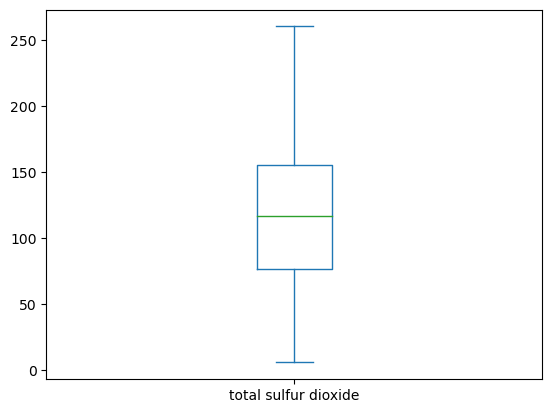

In [26]:
# here we see the median25th and 75th percentiles, the range, and the outliers
df_combined['total sulfur dioxide'].plot.box()

<Axes: >

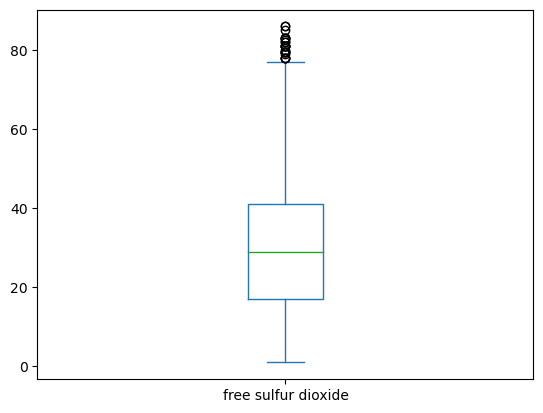

In [28]:
df_combined['free sulfur dioxide'].plot.box()

As we can see, the standard deviation is relatively small on most features. The features with higher STD f.ex 'free sulfur dioxide' has a few outliers in the upper end, but nothing serious.
Generally the data has normal distribution

### Comparing white and red

In [31]:
# Convert color to category
df_combined["color"] = df_combined["color"].astype('category')
df_combined.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
color                   category
dtype: object

array([[<Axes: title={'center': 'fixed acidity'}, xlabel='color'>,
        <Axes: title={'center': 'residual sugar'}, xlabel='color'>],
       [<Axes: title={'center': 'alcohol'}, xlabel='color'>,
        <Axes: title={'center': 'quality'}, xlabel='color'>]],
      dtype=object)

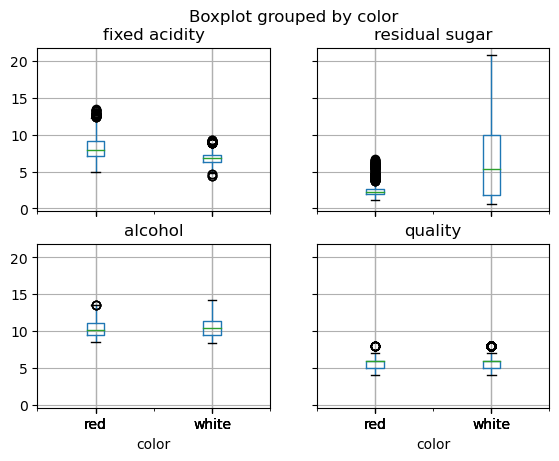

In [38]:
df_combined.boxplot(column=['fixed acidity', 'residual sugar', 'alcohol', 'quality'], by='color')

From these plots we can see that red wines tend to have slighty more acidity, and white wines seems to usually have around the same acidity.
White wine seems to have a wide range of sugar amounts and a higher average, and red wines usually seem to have lower sugar content
Alcohol percentage seems to be around the same distribution for both types, which is around 10% in median. The white wine average seems to be slightly higher.

The overall quality seems to be around the same distribution for both types.


<Axes: xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

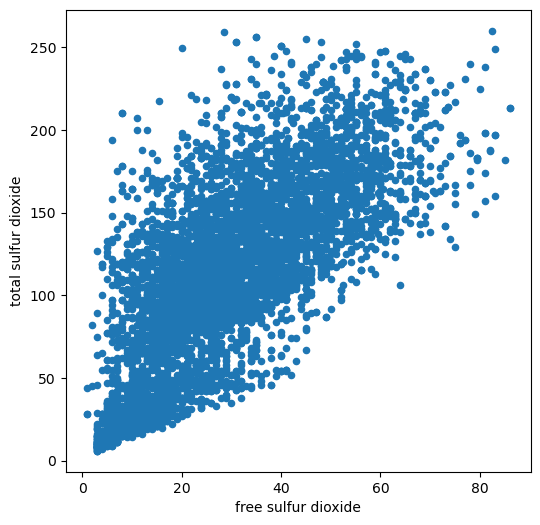

In [53]:
# Here we see an expected correlation between free sulfur and total sulfur
df_combined.plot.scatter(x='free sulfur dioxide', y='total sulfur dioxide', figsize=(6, 6))

Here is an interesting correlation between the alcohol percentage and the density of the wine.
The points are seperated in colors, showing us that red wine seems to have a higher overall density than white wine, which might be interesting to businesses or customers

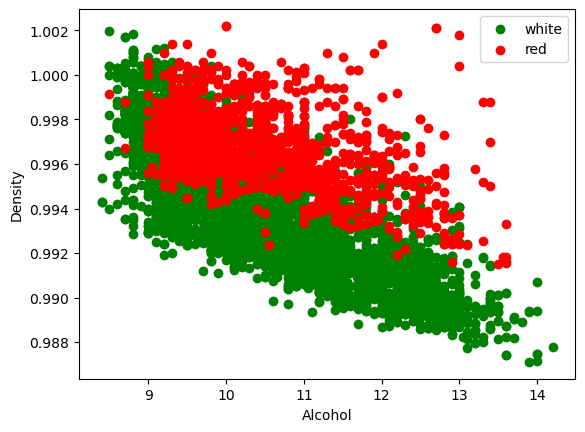

In [57]:
white = df_combined[df_combined['color'] == 'white']
red = df_combined[df_combined['color'] == 'red']

plt.scatter(white['alcohol'], white['density'], color='green', label='white')
plt.scatter(red['alcohol'], red['density'], color='red', label='red')

plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.legend()

### Creating subsets

In [91]:
bin_data = df_combined[['pH']]
bin_data['color'] = df_combined['color']

/tmp/ipykernel_2111/2453600632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['color'] = df_combined['color']


In [97]:
bin_data['pH_bin'] = pd.cut(df_combined['pH'], bins=[0, 2.9, 3.1, 3.3, 3.5, 3.8], labels=["Low", "Low-Mid", "Mid", "High-Mid", "High"])
bin_data

/tmp/ipykernel_2111/729338664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['pH_bin'] = pd.cut(df_combined['pH'], bins=[0, 2.9, 3.1, 3.3, 3.5, 3.8], labels=["Low", "Low-Mid", "Mid", "High-Mid", "High"])


,pH,color,pH_bin
0,3.51,red,High
1,3.20,red,Mid
2,3.26,red,Mid
3,3.16,red,Mid
4,3.51,red,High
...,...,...,...
5933,3.27,white,Mid
5934,3.15,white,Mid
5935,2.99,white,Low-Mid
5936,3.34,white,High-Mid


Here we can see that most of the wines have a pH value between 3.1and 3.3

<Axes: xlabel='pH_bin'>

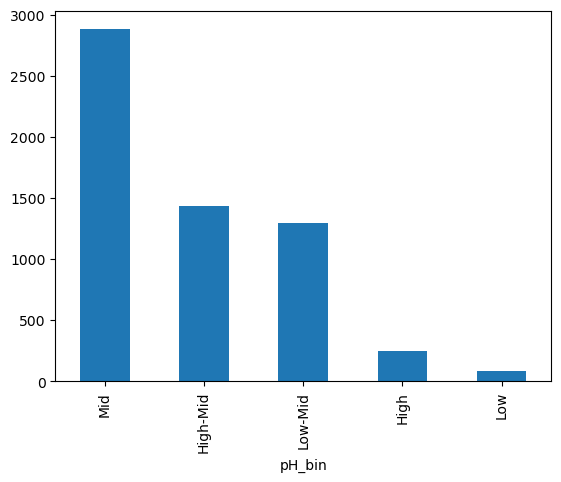

In [98]:
bin_data['pH_bin'].value_counts().plot(kind='bar')

### Correlation

In [119]:
df_cat_num = df_combined
df_cat_num["color_cat"] = df_combined["color"].cat.codes
df_cat_num = df_cat_num.drop(['color'], axis=1)

In [134]:
df_corr = df_cat_num.corr()
df_corr

fixed acidity          -0.067134
volatile acidity       -0.236757
citric acid             0.108162
residual sugar         -0.034869
chlorides              -0.241818
free sulfur dioxide     0.071612
total sulfur dioxide   -0.030991
density                -0.314467
pH                      0.004007
sulphates               0.042518
alcohol                 0.457154
quality                 1.000000
color_cat               0.130226
Name: quality, dtype: float64

In this heatmap, we can see the strong negative correlation between alchohol and density.
We can also see that the quality of the wine doesn't strongly correlate to anything, but correlates partly to density, volatile acidity, chlorides and alcohol percentage

<Axes: >

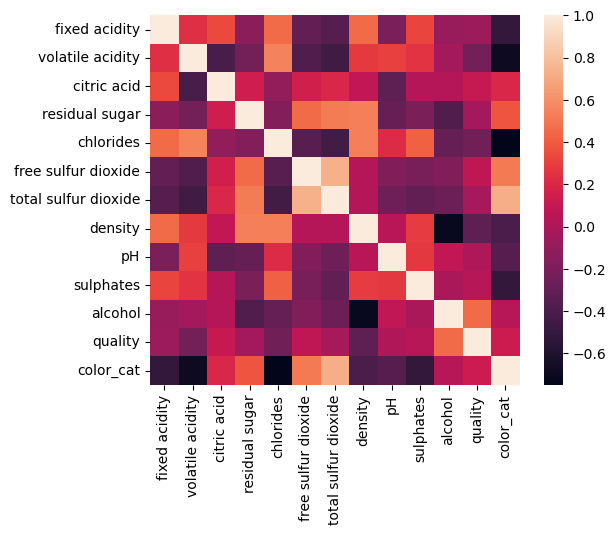

In [123]:
sns.heatmap(df_corr, annot=False, square=True)

Lets split it up into its categories:

In [124]:
df_cat_num_white = white
df_cat_num_white["color_cat"] = white["color"].cat.codes
df_cat_num_white = df_cat_num_white.drop(['color'], axis=1)

df_cat_num_red = red
df_cat_num_red["color_cat"] = red["color"].cat.codes
df_cat_num_red = df_cat_num_red.drop(['color'], axis=1)

/tmp/ipykernel_2111/189827961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_num_white["color_cat"] = white["color"].cat.codes
/tmp/ipykernel_2111/189827961.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_num_red["color_cat"] = red["color"].cat.codes


In [125]:
df_corr_white = df_cat_num_white.corr()
df_corr_red = df_cat_num_red.corr()

White wine correlation map:

<Axes: >

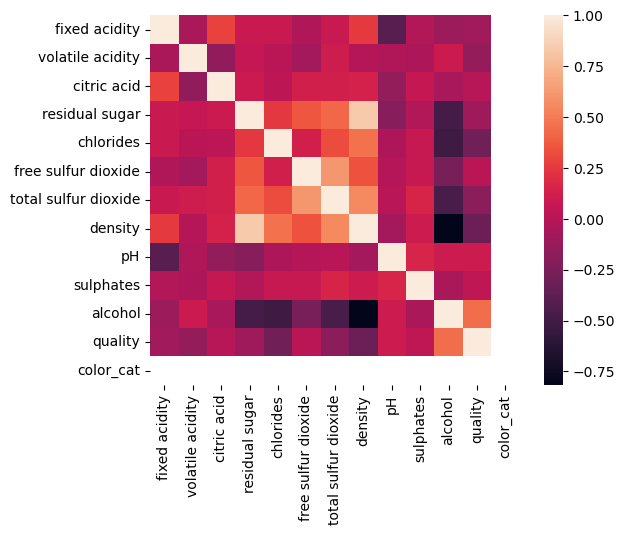

In [128]:
sns.heatmap(df_corr_white, annot=False, square=True)

Red wine correlation map:

<Axes: >

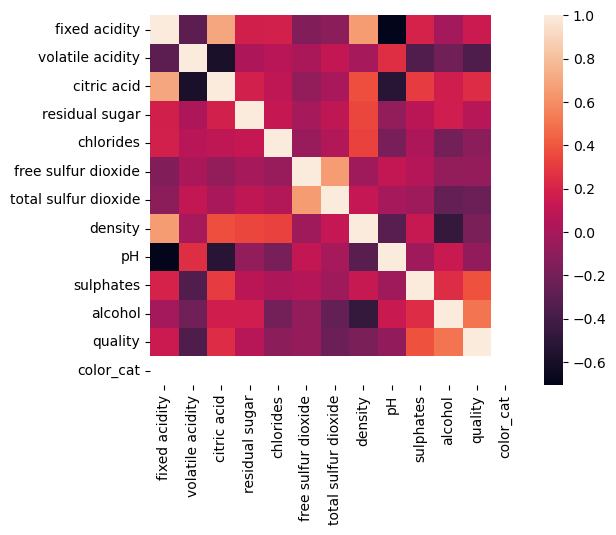

In [129]:
sns.heatmap(df_corr_red, annot=False, square=True)

Funnily enough, it seems that the acidity correlates more to pH value in white wines than in red wines.
The white wines seem to have a stronger correlation between alchohol and density than red wine.
In white wines, it seems that the quality of the wine correlates most with density and chlorides,
and red wines quality seems to correlate closer to the pH value and sulphates of the wine.

## Preparing data for further analysis

<Axes: >

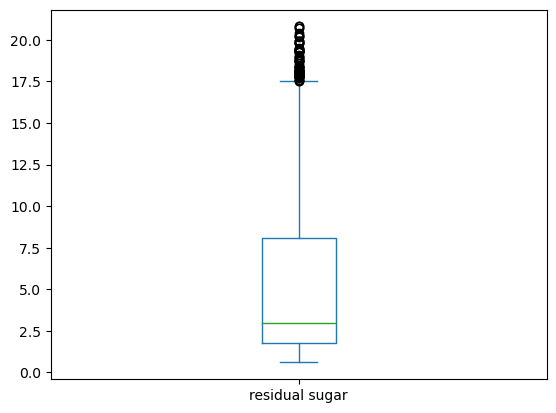

In [130]:
# checking for outliers
df_combined['residual sugar'].plot.box()

In [131]:
df_combined['residual sugar'].max()

20.8

In [132]:
# 2 outlier rows
df_combined.loc[(df_combined['residual sugar'] == df_combined['residual sugar'].max())]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,color_cat
1859,6.9,0.24,0.36,20.8,0.031,40.0,139.0,0.99750,3.20,0.33,11.0,6,white,1
4845,6.2,0.22,0.20,20.8,0.035,58.0,184.0,1.00022,3.11,0.53,9.0,6,white,1


In [133]:
df_combined = df_combined.drop([1859, 4845])

In [135]:
# Get index of feature least correlating with quality
min_corr_column = df_corr['quality'].abs().idxmin()
min_corr_column

'pH'

In [139]:
df_combined = df_combined.drop(['pH', 'color'], axis=1)
df_combined

KeyError: "['pH'] not found in axis"

In [143]:
df_combined = df_combined.drop(['color'], axis=1)

## PCA

In [145]:
X = df_combined.values
X

array([[ 7.4 ,  0.7 ,  0.  , ...,  9.4 ,  5.  ,  0.  ],
       [ 7.8 ,  0.88,  0.  , ...,  9.8 ,  5.  ,  0.  ],
       [ 7.8 ,  0.76,  0.04, ...,  9.8 ,  5.  ,  0.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  9.4 ,  6.  ,  1.  ],
       [ 5.5 ,  0.29,  0.3 , ..., 12.8 ,  7.  ,  1.  ],
       [ 6.  ,  0.21,  0.38, ..., 11.8 ,  6.  ,  1.  ]])

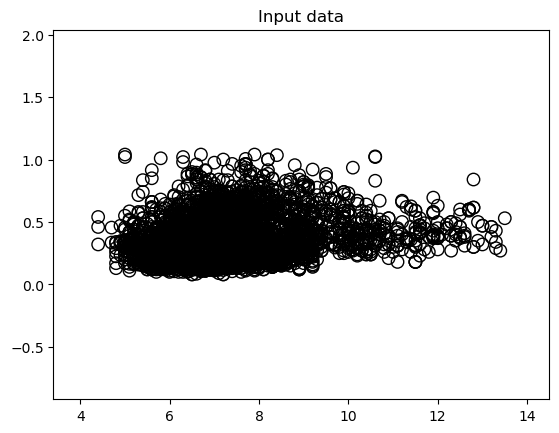

In [146]:
plt.figure()
plt.title('Input data')

# calculate the range of coordinates
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# plot coordinates
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# plot the points
plt.scatter(X[:,0], X[:,1], color='black', s=80, marker='o', facecolors='none')

plt.show()

In [152]:
# Method L1: Least Absolute Deviation
# if we add the normalized values in each row, the sum of the new values is always 1
nl1 = prep.normalize(X, norm='l1')
nl1


In [153]:
sc = StandardScaler()
X = nl1
X = sc.fit_transform(X)  
X

array([[ 0.25264901,  1.87860637, -1.75697472, ..., -0.60764228,
        -0.66629628, -1.50765591],
       [ 0.47445809,  2.53101877, -1.62949518, ..., -0.35954997,
        -0.61875696, -1.41335945],
       [ 0.48857379,  2.08816524, -1.47857889, ..., -0.37424949,
        -0.64339857, -1.46223724],
       ...,
       [-0.83879356, -0.78982003, -1.5223041 , ..., -1.35110684,
         0.23713536,  0.71823389],
       [-1.1661833 , -0.07415878, -0.08481053, ...,  1.54069458,
         1.06130706,  0.30031857],
       [-0.87305386, -0.59662385,  0.51040839, ...,  0.95205818,
         0.13792184,  0.34948646]])

In [154]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_data = pca.fit_transform(X)
pca_data

array([[ 3.22408718,  0.05608377,  1.68960006, -0.19186549],
       [ 3.47324511,  0.2842167 ,  1.45609902, -0.81955152],
       [ 3.42109026,  0.12343016,  1.28244477, -0.45928628],
       ...,
       [-1.04776743, -0.8019106 ,  1.70208723,  0.52194274],
       [-1.47660599, -2.63584591,  0.49677673, -0.23627105],
       [-1.65456924, -2.16078125,  0.27867909,  1.02914559]])

In [155]:
pcadf = pd.DataFrame(data = pca_data, columns = ['pc 1', 'pc 2', 'pc 3', 'pc 4'])
pcadf

,pc 1,pc 2,pc 3,pc 4
0,3.224087,0.056084,1.689600,-0.191865
1,3.473245,0.284217,1.456099,-0.819552
2,3.421090,0.123430,1.282445,-0.459286
3,2.677979,0.381712,-2.752832,0.956121
4,3.224087,0.056084,1.689600,-0.191865
...,...,...,...,...
5931,-1.351670,-2.418884,0.595351,0.452525
5932,-1.518079,2.208003,0.534660,0.292671
5933,-1.047767,-0.801911,1.702087,0.521943
5934,-1.476606,-2.635846,0.496777,-0.236271


In [156]:
# first principal component 29% variance
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.2944661 , 0.22061381, 0.11338402, 0.08624752])

/tmp/ipykernel_2111/1047061413.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(explained_variance, 'bx-', c='red')


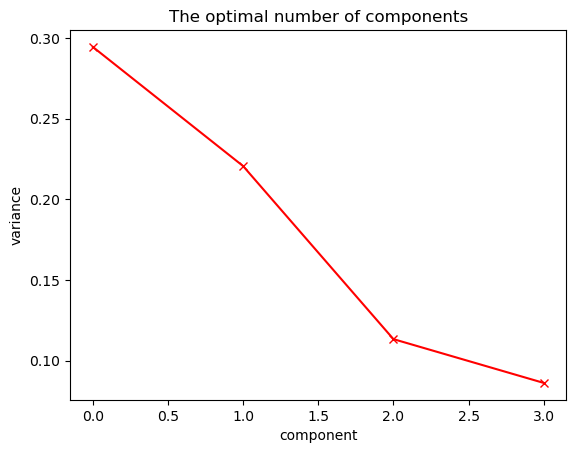

In [157]:
# Plot the explained_variance
plt.plot(explained_variance, 'bx-', c='red')
plt.xlabel('component')
plt.ylabel('variance')
plt.title('The optimal number of components')
plt.show()

/tmp/ipykernel_2111/4136409294.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b*-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(cumulative, 'b*-', c='green')


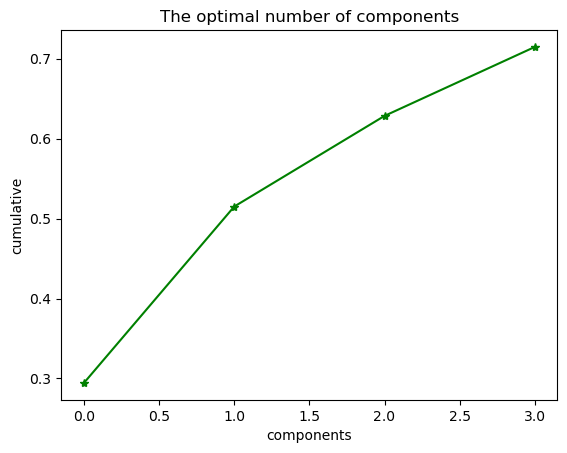

In [158]:
# Plot the cumulative explained_variance
cumulative = np.cumsum(explained_variance)
plt.plot(cumulative, 'b*-', c='green')
plt.xlabel('components')
plt.ylabel('cumulative')
plt.title('The optimal number of components')
plt.show()


It seems to me that the optimal number of principal components is 3, since we will retain about 75% variance of the dataset by using these 3 principal components.

In [162]:
loadings = pca.components_[0]
loadings_df = pd.DataFrame(loadings, index=df_combined.columns, columns=['Loadings'])
loadings_df

,Loadings
fixed acidity,0.276092
volatile acidity,0.382835
citric acid,-0.118735
residual sugar,-0.131980
chlorides,0.422060
free sulfur dioxide,-0.280106
total sulfur dioxide,-0.336897
density,0.227043
sulphates,0.249047
alcohol,-0.081185


In [166]:
p_comps = loadings_df['Loadings'].abs().nlargest(3)
p_comps

color_cat           0.486745
chlorides           0.422060
volatile acidity    0.382835
Name: Loadings, dtype: float64

In [176]:
# Create new dataframe from principal components
indexes = [*p_comps.index, 'quality']
p_df = df_combined[indexes]
p_df.sample(10)

,color_cat,chlorides,volatile acidity,quality
2285,1,0.036,0.250,8
4011,1,0.041,0.150,6
4355,1,0.033,0.450,7
2375,1,0.063,0.240,7
677,0,0.096,0.655,5
5787,1,0.048,0.300,5
5603,1,0.068,0.370,6
5679,1,0.030,0.440,6
715,0,0.044,0.585,7
465,0,0.086,0.430,5
